# Importing Libraries


In [ ]:
!pip install yfinance

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


# Stock Selection

In [ ]:
start = '2017-06-01' #START DATE
end = '2020-06-01'  #END DATE

name_stock1 = "EICHERMOT.NS"
name_stock2 = "MOTHERSON.NS"

stock1 = yf.Ticker(name_stock1)
stock2 = yf.Ticker(name_stock2)

#USING THE DATASET OF DAILY STOCK PRICES
stock1_data = stock1.history(interval = '1d' , start = start , end = end)
stock2_data = stock2.history(interval = '1d' , start = start , end = end)

In [ ]:
stock1_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-06-01 00:00:00+05:30,2728.236737,2770.186545,2720.599966,2748.607910,474760,0.0,0.0
2017-06-02 00:00:00+05:30,2765.465892,2796.967575,2758.783717,2785.521973,299540,0.0,0.0
2017-06-05 00:00:00+05:30,2782.758410,2805.081658,2782.758410,2799.401855,168290,0.0,0.0
2017-06-06 00:00:00+05:30,2797.444983,2805.435068,2768.329791,2786.581787,169780,0.0,0.0
2017-06-07 00:00:00+05:30,2787.030605,2842.382755,2787.030605,2836.411865,465870,0.0,0.0
...,...,...,...,...,...,...,...
2020-05-22 00:00:00+05:30,1357.382886,1376.614416,1337.755979,1359.472534,1836960,0.0,0.0
2020-05-26 00:00:00+05:30,1377.302886,1452.490637,1373.397029,1445.665161,3191320,0.0,0.0
2020-05-27 00:00:00+05:30,1452.978691,1476.413831,1416.361284,1461.468994,3017880,0.0,0.0


In [ ]:
stock2_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-06-01 00:00:00+05:30,74.311901,74.988667,73.849723,73.990028,7992818,0.0,0.0
2017-06-02 00:00:00+05:30,74.080804,75.582889,73.981761,74.988655,8557902,0.0,0.0
2017-06-05 00:00:00+05:30,74.996914,75.599397,74.873113,75.054688,3376939,0.0,0.0
2017-06-06 00:00:00+05:30,75.104207,76.540264,74.732810,75.549881,13369082,0.0,0.0
2017-06-07 00:00:00+05:30,75.533376,76.424724,75.128972,76.111107,5847598,0.0,0.0
...,...,...,...,...,...,...,...
2020-05-22 00:00:00+05:30,32.430026,32.730301,31.389060,31.709358,19625918,0.0,0.0
2020-05-26 00:00:00+05:30,32.029658,34.151623,31.909551,33.871365,55279243,0.0,0.0
2020-05-27 00:00:00+05:30,34.231698,34.792219,33.390918,34.672104,49363482,0.0,0.0


# Plots for Closing Prices of the Stocks


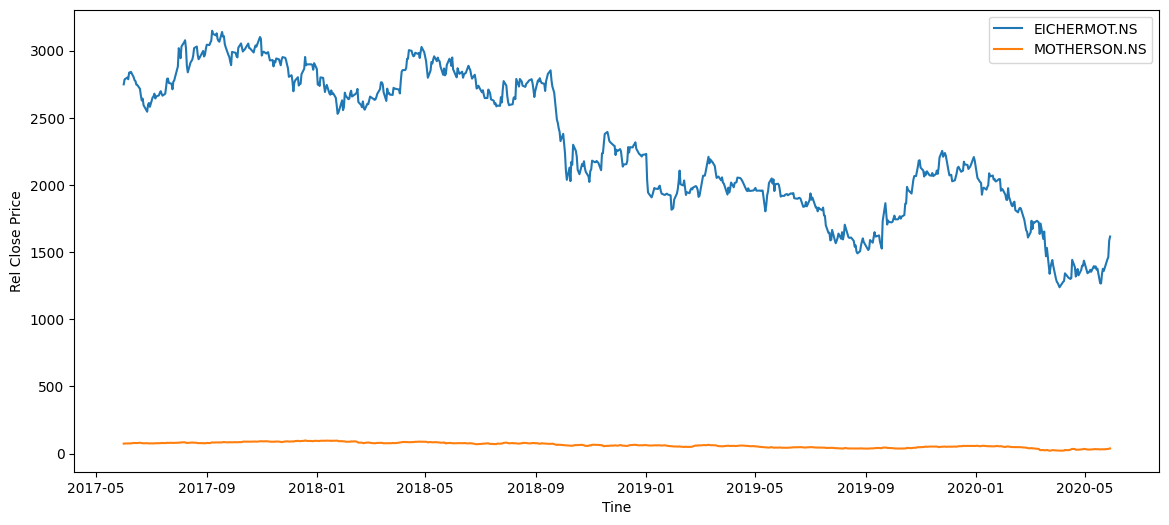

In [ ]:
plt.figure(figsize=(14, 6))
stock1_close_relative = stock1_data["Close"] / stock1_data["Close"][0]
stock2_close_relative = stock2_data["Close"]/ stock2_data["Close"][0]
plt.plot(stock1_close_relative , label = name_stock1 )
plt.plot(stock2_close_relative , label = name_stock2 )
plt.xlabel("Tine")
plt.ylabel("Rel Close Price")
plt.legend()
plt.show()

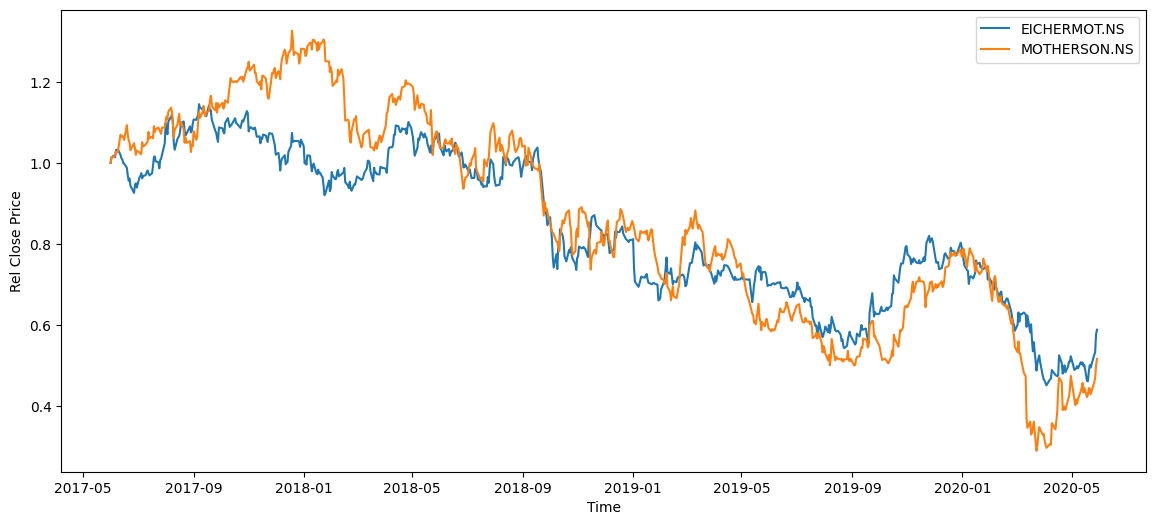

In [ ]:
plt.figure(figsize=(14, 6))
stock1_close_relative = stock1_data["Close"] / stock1_data["Close"][0]
stock2_close_relative = stock2_data["Close"]/ stock2_data["Close"][0]
plt.plot(stock1_close_relative , label = name_stock1 )
plt.plot(stock2_close_relative , label = name_stock2 )
plt.xlabel("Time")
plt.ylabel("Rel Close Price")
plt.legend()
plt.show()

# Plots for Relative Closing Prices of the Stocks


# p-value for the selected pair

In [ ]:
# prints the p value for the null hypothesis
from statsmodels.tsa.stattools import coint, adfuller
coint_result = coint(stock2_data["Close"],stock1_data["Close"])
print(coint_result[1])

0.004177840334319571


# Performing Linear Regressing using OLS

In [ ]:
Y = np.log(stock2_data["Close"]) #TAKING LOGARITHM OF THE CLOSE PRICE OF STOCK 2
X = np.log(stock1_data["Close"]) #TAKING LOGARITHM OF THE CLOSE PRICE OF STOCK 1
X = sm.add_constant(X)  #ADDING A CONSTANT WHICH IS THE INTERCEPT
model = sm.OLS(Y,X)  #FITTING THE LINEAR REGRESSING MODEL
results = model.fit()
results.params

beta = results.params.values[1]  #EXTRACTS THE SLOPE OF THE LR
errors = Y - (X["Close"]*beta)

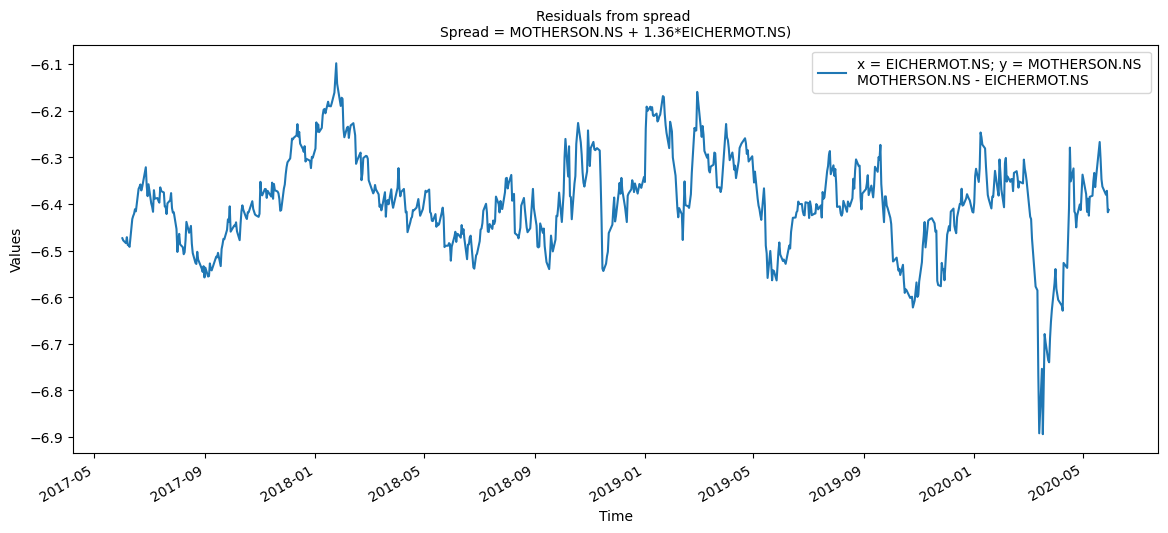

In [ ]:
plt.figure(figsize=(14, 6))

errors.plot(label=f"x = {name_stock1}; y = {name_stock2} \n{name_stock2} - {name_stock1}")
plt.title(f'Residuals from spread \nSpread = {name_stock2} + {beta:.2f}*{name_stock1})', fontsize=10)
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()


# Calculating the Z-Score

In [ ]:
spread = errors
zscore = (spread-np.mean(spread)) / np.std(spread)

# Plotting the Z-Score

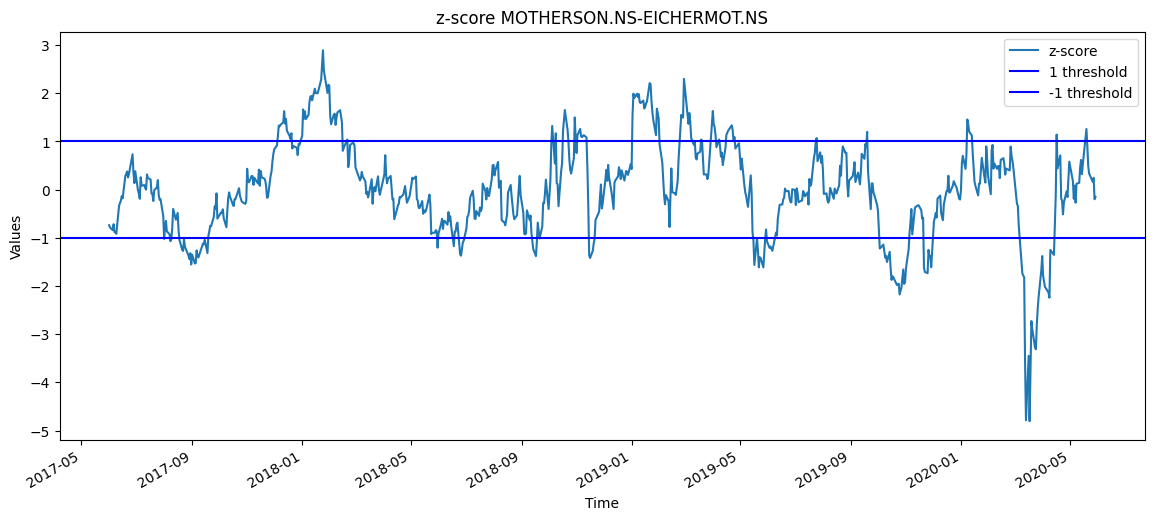

In [ ]:
plt.figure(figsize=(14, 6))
zscore.plot(label='z-score')
plt.title(f"z-score {name_stock2}-{name_stock1}")
plt.xlabel("Time")
plt.ylabel("Values")
plt.axhline(y=1, color='b', label='1 threshold')
plt.axhline(y=-1, color='b', label='-1 threshold')
plt.legend()
plt.show()


# Backtesting

**Generating Signals**

In [ ]:
def generate_trade_signals(S1, S2, spread,zscore):
  signals = pd.DataFrame()
  signals['price1'] = S1
  signals['price2'] = S2
  signals['spread'] = spread
  signals['zscore'] = zscore

  signals.dropna(inplace = True)

  signals['signal1'] = np.select([signals['zscore'] > 1, signals['zscore'] < -1], [-1, 1], default = 0)
  signals['position1'] = signals['signal1'].diff()
  signals['signal2'] = -signals['signal1']
  signals['position2'] = signals['signal2'].diff()
  for i in range(len(signals["position1"])):
    if(signals["position1"][i]>1 or signals["position1"][i]<-1 ):
      signals["position1"][i]=0
    if(signals["position2"][i]>1 or signals["position2"][i]<-1 ):
      signals["position2"][i]=0
  return signals

In [ ]:
trade_signals = generate_trade_signals(stock2_data["Close"],stock1_data["Close"] ,spread,zscore)
trade_signals.dropna(inplace = True)
trade_signals

,price1,price2,spread,zscore,signal1,position1,signal2,position2
Date,,,,,,,,
2017-06-02 00:00:00+05:30,74.988655,2785.521973,-6.478223,-0.785469,0,0.0,0,0.0
2017-06-05 00:00:00+05:30,75.054688,2799.401855,-6.484107,-0.842399,0,0.0,0,0.0
2017-06-06 00:00:00+05:30,75.549881,2786.581787,-6.471284,-0.718342,0,0.0,0,0.0
2017-06-07 00:00:00+05:30,76.111107,2836.411865,-6.488005,-0.880110,0,0.0,0,0.0
2017-06-08 00:00:00+05:30,75.979042,2834.297119,-6.488727,-0.887091,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...
2020-05-22 00:00:00+05:30,31.709358,1359.472534,-6.362664,0.332499,0,0.0,0,0.0
2020-05-26 00:00:00+05:30,33.871365,1445.665161,-6.380369,0.161212,0,0.0,0,0.0
2020-05-27 00:00:00+05:30,34.672104,1461.468994,-6.371801,0.244104,0,0.0,0,0.0


**Plot for the Long & Short Posiitons**

In [ ]:
def plot_pair_trades(trade_signals):
  fig = plt.figure(figsize=(14, 6))
  bx = fig.add_subplot(111)
  series = bx.plot(trade_signals['zscore'], c='#4abdac')
  long = bx.plot(trade_signals['zscore'][trade_signals['position1'] == 1], lw = 0, marker = '^', markersize = 8, c = 'g', alpha = 0.9)
  short = bx.plot(trade_signals['zscore'][trade_signals['position1'] == -1], lw = 0, marker = 'v', markersize = 8, c = 'r', alpha = 0.9)
  plt.title(f'{name_stock2} / {name_stock1}')
  plt.legend(['Z-Score', 'Long', 'Short'])

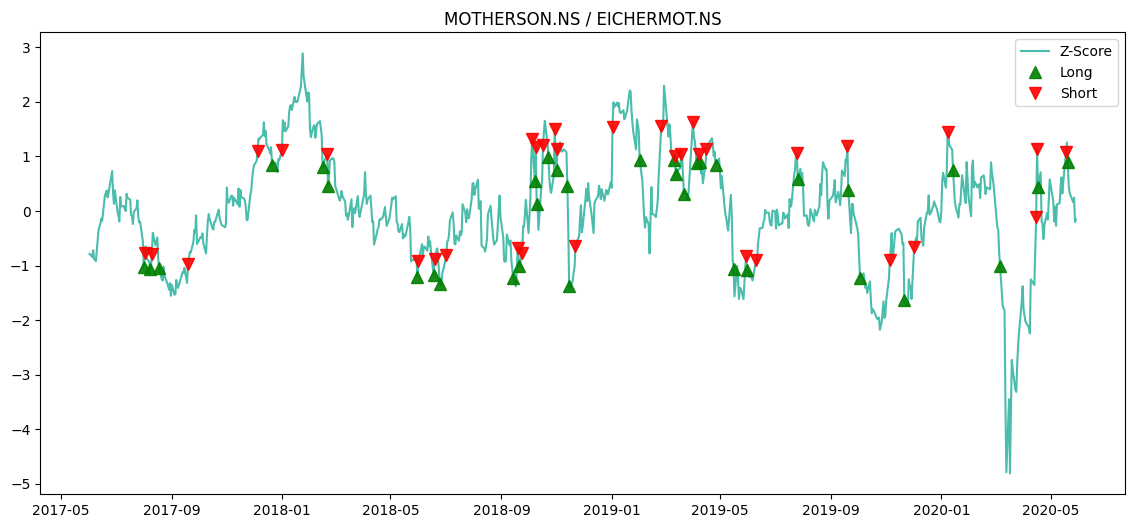

In [ ]:
plot_pair_trades(trade_signals)

**PnL Calculation**

In [ ]:
def pnl_calculation(signals):

  initial_capital = 50000

  # Shares to buy for each stock
  shares1 = initial_capital// (signals['price1'][0])
  shares2 = initial_capital// (signals['price2'][0])

  #PnL for stock 1
  portfolio = pd.DataFrame()
  portfolio['holdings1'] = signals['position1'].cumsum() * signals['price1'] * shares1
  portfolio['cash1'] = initial_capital - (signals['position1'] * signals['price1'] * shares1).cumsum()
  portfolio['total1'] = portfolio['holdings1'] + portfolio['cash1']
  portfolio['return1'] = portfolio['total1'].pct_change()

  # PnL for stock 2
  portfolio['holdings2'] = signals['position2'].cumsum() * signals['price2'] * shares2
  portfolio['cash2'] = initial_capital - (signals['position2'] * signals['price2'] * shares2).cumsum()
  portfolio['total2'] = portfolio['holdings2'] + portfolio['cash2']
  portfolio['return2'] = portfolio['total2'].pct_change()

  # Total PnL
  portfolio['total'] = portfolio['total1'] + portfolio['total2']
  portfolio = portfolio.dropna()

  return portfolio


In [ ]:
portfolio = pnl_calculation(trade_signals)
portfolio.head()

,holdings1,cash1,total1,return1,holdings2,cash2,total2,return2,total
Date,,,,,,,,,
2017-06-05 00:00:00+05:30,0.0,50000.0,50000.0,0.0,0.0,50000.0,50000.0,0.0,100000.0
2017-06-06 00:00:00+05:30,0.0,50000.0,50000.0,0.0,0.0,50000.0,50000.0,0.0,100000.0
2017-06-07 00:00:00+05:30,0.0,50000.0,50000.0,0.0,0.0,50000.0,50000.0,0.0,100000.0
2017-06-08 00:00:00+05:30,0.0,50000.0,50000.0,0.0,0.0,50000.0,50000.0,0.0,100000.0
2017-06-09 00:00:00+05:30,0.0,50000.0,50000.0,0.0,0.0,50000.0,50000.0,0.0,100000.0


# Portfolio Curve

In [ ]:
def plot_portfolio_value(portfolio):

  fig = plt.figure(figsize=(14,6),)
  ax = fig.add_subplot(111)
  l1, = ax.plot(portfolio['total'], c='g')
  ax.set_ylabel('Asset Value')
  ax.yaxis.labelpad=15
  ax.set_xlabel('Date')
  ax.xaxis.labelpad=15
  plt.title('Portfolio Performance PnL')
  plt.legend(['Total Portfolio Value'])

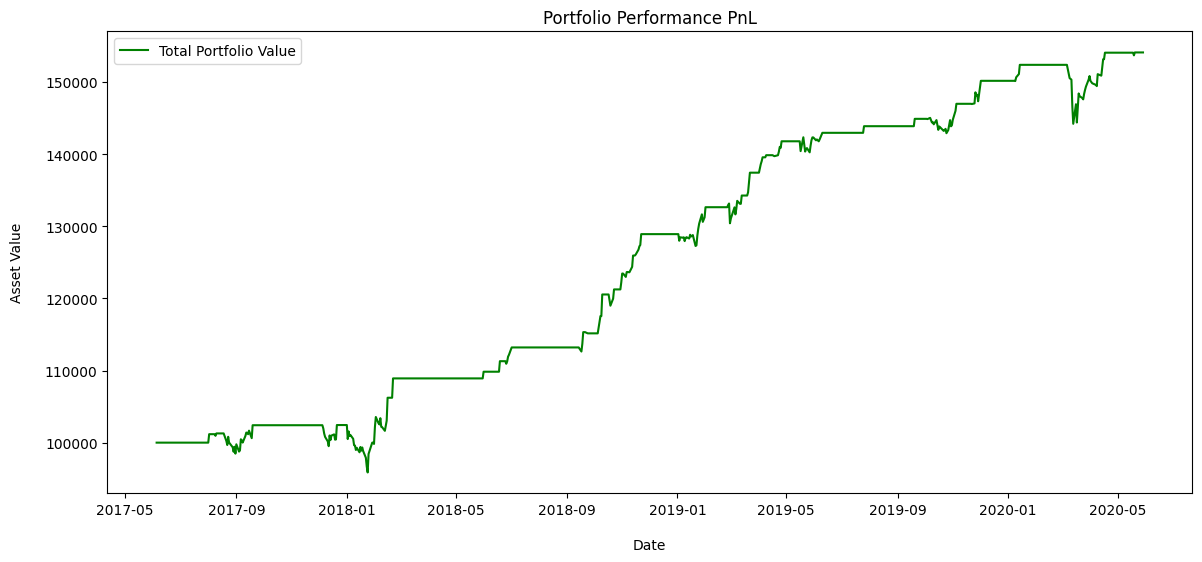

In [ ]:
plot_portfolio_value(portfolio)